### About Dataset

The dataset used is from https://www.kaggle.com/anshulmehtakaggl/sharktankindia containing the details of a popular show in Indian television - Shark Tank India.

There are 14 columns with Episode Number, Pitch Id, Name of the Brand, Brief Idea of the Brand, The amount invested by the sharks, The amount of debt given (if any), the amount of equity diluted by the brand, and the Next seven columns correspond to the Sharks and the Y states if they have invested in that Brand or not. The last column is for the Season Number.

### Sharks

Any five of the following seven sharks are present in each episode except episodes 34-35

* Ashneer Grover Managing Director and Co-founder of BharatPe
* Aman Gupta Co-founder and Chief Marketing Officer of boAt
* Anupam Mittal Founder and CEO of Shaadi.com and People Group
* Ghazal Alagh Co-founder and Chief Mama of MamaEarth
* Namita Thapar Executive Director of Emcure Pharmaceuticals
* Peyush Bansal Co-founder and CEO of Lenskart
* Vineeta Singh CEO and co-founder of SUGAR Cosmetics

### Importing modules

In [1]:
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

pio.templates.default = "plotly_dark"

In [3]:
df=pd.read_csv("../input/shark-tank-india/ShartankIndiaAllPitches.csv")
df.head() # top 5 rows

,Episode Number,Pitch Number,Brand,Idea,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,N,Y,N,N,N,N,N,1
4,2,5,Head and Heart,Brain Development Course,0,0,0,N,N,N,N,N,N,N,1


In [4]:
df.tail() # last 5 rows

,Episode Number,Pitch Number,Brand,Idea,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
112,34,113,Green Protein,Plant-Based Protein,0,0,0,N,N,N,N,N,N,N,1
113,34,114,On2Cook,Fastest Cooking Device,0,0,0,N,N,N,N,N,N,N,1
114,35,115,Jain Shikanji,Lemonade,40,0,30.00%,Y,Y,N,Y,N,Y,N,1
115,35,116,Woloo,Washroom Finder,0,0,0,N,N,N,N,N,N,N,1
116,35,117,Elcare India,Carenting for Elders,0,0,0,N,N,N,N,N,N,N,1


In [5]:
df.shape  # to get number of rows and columns in dataset

(117, 15)

Next thing is to rename of some of the lengthy column names(i.e headers) for easier presentation.

In [6]:
df.rename(columns={"Episode Number":"Episode",
                   "Pitch Number": "Pitch_no",
                   "Investment Amount (In Lakhs INR)":"Investment_amt",
                   "Debt (In lakhs INR)":"Debt_amt"},inplace=True)

df.columns

Index(['Episode', 'Pitch_no', 'Brand', 'Idea',
       'Investment Amount (In Lakhs INR) ', 'Debt_amt', 'Equity', 'Anupam',
       'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal', 'Season'],
      dtype='object')

Let's get the statistical analysis of our dataset by using decribe() of pandas module.

The actual dataset consisted of values with numerous digits after the decimal. To set it out we'll use 'precision' = 2 get a display of 2 digits after the decimal for each and every value.

In [7]:
set_option('precision',2)
df.describe() # only number columns

,Episode,Pitch_no,Investment Amount (In Lakhs INR),Debt_amt,Season
count,117.00,117.00,117.00,117.00,117.0
mean,18.74,59.00,21.68,2.57,1.0
std,10.07,33.92,26.07,11.54,0.0
min,1.00,1.00,0.00,0.00,1.0
25%,10.00,30.00,0.00,0.00,1.0
50%,19.00,59.00,10.00,0.00,1.0
75%,27.00,88.00,50.00,0.00,1.0
max,35.00,117.00,80.00,99.00,1.0


If we want to see the entire dataframe with all the columns, so there's a attribute in panads called include='all'

In [8]:
df.describe(include="all") # with entire columns

,Episode,Pitch_no,Brand,Idea,Investment Amount (In Lakhs INR),Debt_amt,Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
count,117.00,117.00,117,117,117.00,117.00,117,117,117,117,117,117,117,117,117.0
unique,NaN,NaN,117,117,NaN,NaN,39,2,2,2,2,2,2,2,NaN
top,NaN,NaN,BluePine Industries,Frozen Momos,NaN,NaN,0,N,N,N,N,N,N,N,NaN
freq,NaN,NaN,1,1,NaN,NaN,52,93,96,95,89,90,102,110,NaN
mean,18.74,59.00,NaN,NaN,21.68,2.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,10.07,33.92,NaN,NaN,26.07,11.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,1.00,1.00,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,10.00,30.00,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,19.00,59.00,NaN,NaN,10.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,27.00,88.00,NaN,NaN,50.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Visualisation through Scatter Plot

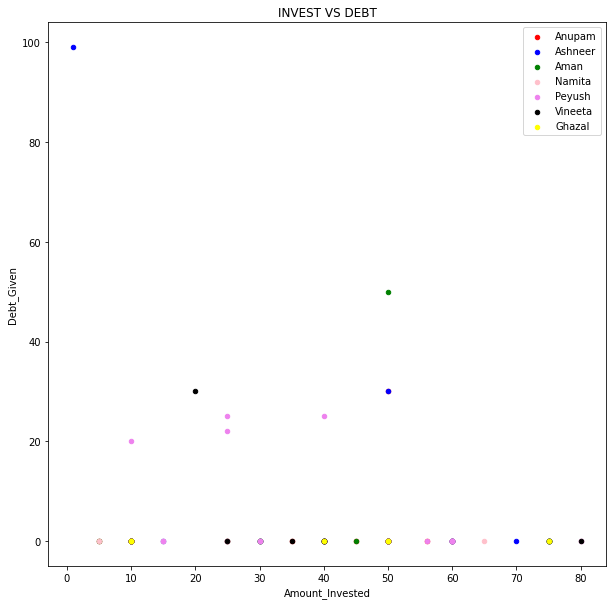

In [9]:
fig=df[df.Anupam=="Y"].plot(kind="scatter",x='Investment Amount (In Lakhs INR) ',y="Debt_amt",color="red",label="Anupam")
df[df.Ashneer=="Y"].plot(kind="scatter",x='Investment Amount (In Lakhs INR) ',y="Debt_amt",color="blue",label="Ashneer",ax=fig)
df[df.Aman=="Y"].plot(kind="scatter",x='Investment Amount (In Lakhs INR) ',y="Debt_amt",color="green",label="Aman",ax=fig)
df[df.Namita=="Y"].plot(kind="scatter",x='Investment Amount (In Lakhs INR) ',y="Debt_amt",color="pink",label="Namita",ax=fig)
df[df.Peyush=="Y"].plot(kind="scatter",x='Investment Amount (In Lakhs INR) ',y="Debt_amt",color="violet",label="Peyush",ax=fig)
df[df.Vineeta=="Y"].plot(kind="scatter",x='Investment Amount (In Lakhs INR) ',y="Debt_amt",color="black",label="Vineeta",ax=fig)
df[df.Ghazal=="Y"].plot(kind="scatter",x='Investment Amount (In Lakhs INR) ',y="Debt_amt",color="yellow",label="Ghazal",ax=fig)

fig.set_xlabel("Amount_Invested") # Name of X axis
fig.set_ylabel("Debt_Given")  # Name of Y axis
fig.set_title("INVEST VS DEBT") # Tittle of Figure

plt.gcf().set_size_inches((10, 10)) 
"""plt.gcf() is primarily used to get the current figure. 
If no current figure is available then one is created with the help of the figure() function"""


plt.show() # to show plot

If we wanna know about the ideas that Aman(or any other sharks) has approved, can be done like this

In [10]:
Aman=df[df.Aman=="Y"]
Aman.head()

,Episode,Pitch_no,Brand,Idea,Investment Amount (In Lakhs INR),Debt_amt,Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
7,3,8,Peeschute,Disposable Urine Bag,75,0,6%,N,N,N,Y,N,N,N,1
11,4,12,Bummer,Underwear,75,0,7.50%,N,N,Y,Y,N,N,N,1
12,5,13,Revamp Moto,E-Bike,10,0,1.50%,Y,N,N,Y,N,N,N,1
15,6,16,Skippi Pops,Ice-Pops,10,0,15%,Y,Y,Y,Y,N,Y,N,1


<AxesSubplot:title={'center':'Investment by Aman Gupta'}>

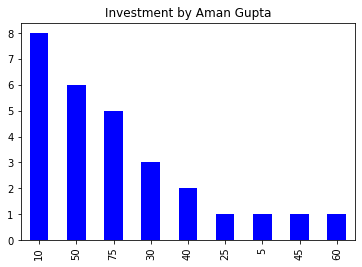

In [11]:
Aman=df[df.Aman=="Y"]
Aman['Investment Amount (In Lakhs INR) '].value_counts().plot(kind="bar",color="blue",title="Investment by Aman Gupta")

In [12]:
print("Total investments made by Aman Gupta - \n")
Aman['Investment Amount (In Lakhs INR) '].sum()

Total investments made by Aman Gupta - 



1060

To know which brand got the highest investment with the help of visualising tool (bar graph)

In [13]:
x=df.sort_values('Investment Amount (In Lakhs INR) ',ascending=False)

fig=px.bar(x[0:20],x="Brand",y='Investment Amount (In Lakhs INR) ',color="Brand",title="Highest Investment to Brands")
fig.show()